# **SARIMA (Seasonal Auto Regressive Integrated Moving Average**

# What is SARIMAX?

Sarimax is a combination of autoregressive integrated moving average (ARIMA) and seasonal autoregressive integrated moving average (SARIMA) models.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import yfinance as yf # data scraping for exracting data. it is the stock data

import datetime as dt
from datetime import date , timedelta

import plotly.graph_objects as go # to changes the graph and plots
import plotly.express as px

from statsmodels.tsa.stattools import adfuller  # test for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model

In [2]:
# define the start and end date
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1

d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

start_date , end_date

('2023-07-03', '2024-07-02')

In [3]:
# Define the ticker 
ticker = 'GOOGL'

# download the data 
df = yf.download(ticker, start=start_date, end=end_date , progress=False)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,119.239998,120.190002,118.820000,119.900002,119.762550,14467900
2023-07-05,119.239998,122.610001,119.230003,121.750000,121.610428,27584800
2023-07-06,119.800003,120.300003,118.400002,120.110001,119.972313,24745200
2023-07-07,120.099998,121.050003,119.400002,119.480003,119.343033,21692600
2023-07-10,118.300003,118.309998,116.139999,116.449997,116.316498,35315200


In [5]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-07-03 to 2024-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [6]:
df['Date'] = df.index
df.reset_index(drop = True , inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       251 non-null    float64       
 1   High       251 non-null    float64       
 2   Low        251 non-null    float64       
 3   Close      251 non-null    float64       
 4   Adj Close  251 non-null    float64       
 5   Volume     251 non-null    int64         
 6   Date       251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [8]:
# reset column sequence
df = df[['Date' , 'Open' , 'High' , 'Low' , 'Close' , 'Adj Close' , 'Volume']]

# reset column sequence
# df.insert(0, 'Date' , df.index , True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [10]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2023-12-30 16:26:46.374501888,143.792430,145.291354,142.531952,143.997570,143.844768,2.866583e+07
min,2023-07-03 00:00:00,116.290001,117.709999,115.349998,116.449997,116.316498,1.251430e+07
25%,2023-09-30 12:00:00,131.834999,133.375000,130.674995,132.339996,132.188286,2.210880e+07
50%,2023-12-29 00:00:00,138.419998,139.449997,137.080002,138.419998,138.261322,2.588430e+07
75%,2024-04-01 12:00:00,151.695000,154.239998,150.939995,153.004997,152.829597,3.123280e+07
max,2024-07-01 00:00:00,184.320007,186.050003,184.020004,185.410004,185.410004,8.436620e+07
std,NaN,16.599272,16.712705,16.545044,16.719551,16.726397,1.088859e+07


In [11]:
fig = px.line(df,x= 'Date' , y = df.columns[1:] , title="Google Stock Price" )
fig.show()

In [12]:
# select close and date column
df1 = df[['Date' , 'Close']]

df1.head()

,Date,Close
0,2023-07-03,119.900002
1,2023-07-05,121.750000
2,2023-07-06,120.110001
3,2023-07-07,119.480003
4,2023-07-10,116.449997


In [13]:
# plot the data to see how it looks like using plotly
fig = px.line(df1, x= 'Date' , y = 'Close' , title="Google Stock Price")
fig.show()

In [14]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistics: %f' % result[0])
    print('p value: %f' % result[1])
    if result[1] <= 0.05:
        print('Reject null hypothesis. Data is stationary')
    else:
        print('Fail to Reject null hypothesis. Data is not stationary')

check_stationarity(df['Close'])

ADF Statistics: -0.261550
p value: 0.930776
Fail to Reject null hypothesis. Data is not stationary


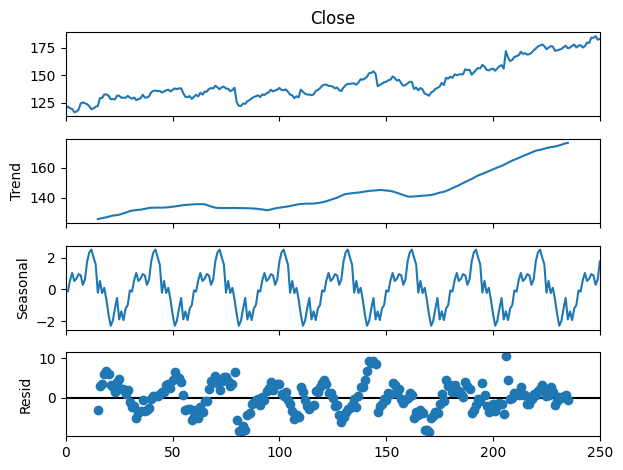

In [15]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(df['Close'] , model = 'additive' , period = 30)
result.plot()
pyplot.show()

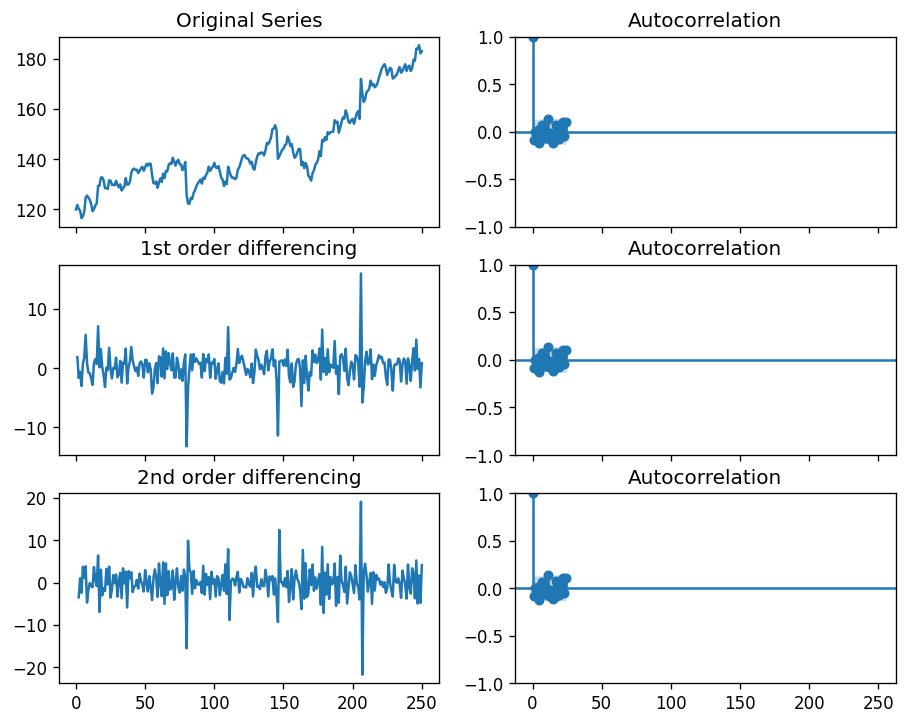

In [19]:
import numpy as np 
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7) , 'figure.dpi':120})

# original series
fig , axes = plt.subplots(3,2,sharex= True)
axes[0,0].plot(df['Close']); axes[0,0].set_title('Original Series')
plot_acf(df['Close'].diff().dropna() , ax=axes[0,1])

# 1st differencing
axes[1,0].plot(df['Close'].diff()); axes[1,0].set_title('1st order differencing')
plot_acf(df['Close'].diff().dropna() , ax=axes[1,1])

# 2st differencing
axes[2,0].plot(df['Close'].diff().diff()); axes[2,0].set_title('2nd order differencing')
plot_acf(df['Close'].diff().dropna() , ax=axes[2,1])

plt.show()

d = 1

# Let Find `p` value

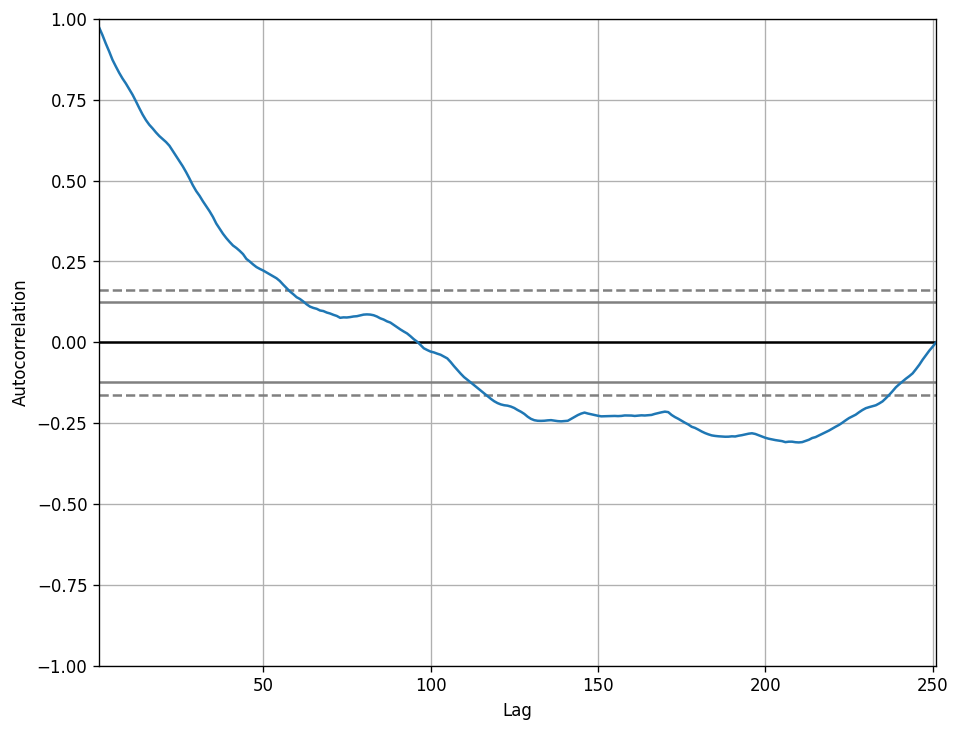

In [20]:
# plots
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

pd.plotting.autocorrelation_plot(df['Close'])
plt.show()

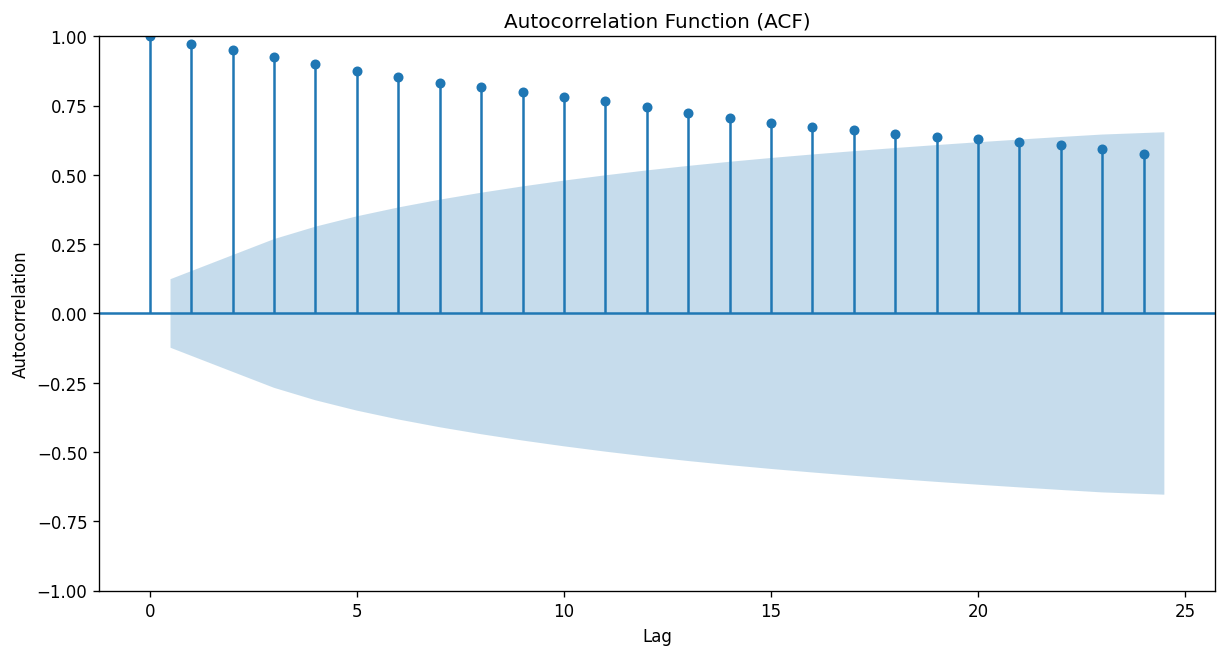

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['Close'], ax=ax, alpha = 0.05)
ax.set_title('Autocorrelation Function (ACF)')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.show()

from statsmodels.tsa.stattools import acf , pacf

acf(df['Close'])

In [23]:

from statsmodels.tsa.stattools import acf , pacf

acf(df['Close'])
# p ki value woh hogi jiski jo 95 se upar ho. to iska matlab p ki value huwi 2.


array([1.        , 0.97360979, 0.95002942, 0.92379195, 0.89948524,
       0.87345048, 0.8529065 , 0.83321037, 0.81558119, 0.80015948,
       0.78265329, 0.7654099 , 0.74522667, 0.72414225, 0.7041351 ,
       0.68686365, 0.67250866, 0.66112984, 0.64868137, 0.63758241,
       0.62843037, 0.61909123, 0.60779167, 0.59181199])

# Let's Find `q` value

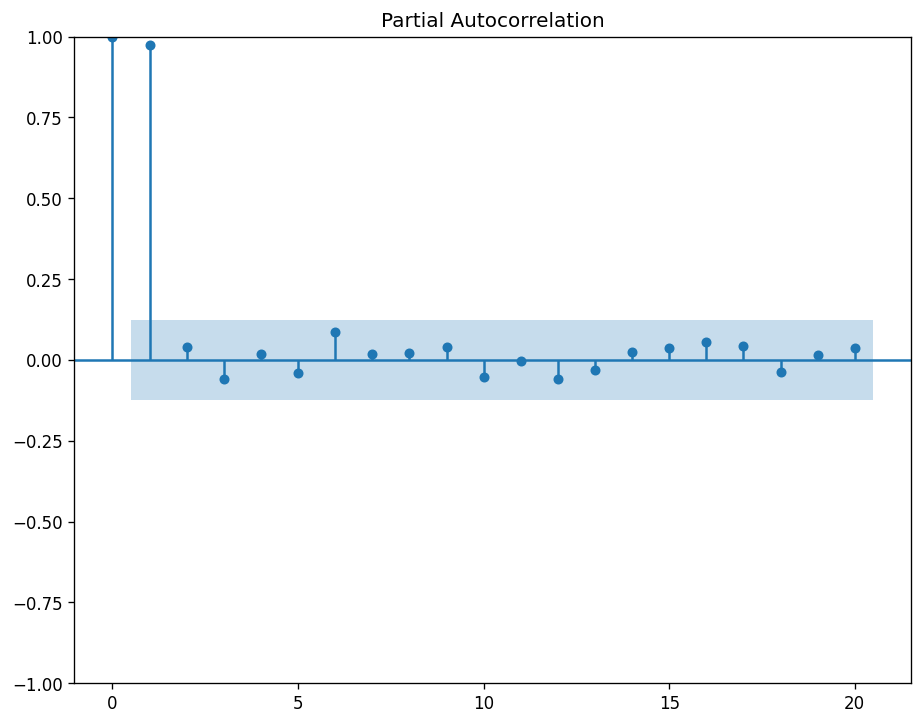

In [25]:
# partial correlation

plot_pacf(df['Close'] , lags = 20 , alpha=0.05)

plt.show()

q = 2

___

In [28]:
# define
p = 2
d = 1
q = 2

In [33]:
# lets run arima with pmdarima 
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1300.499, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1206.341, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1297.678, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1201.955, Time=0.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1202.171, Time=0.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1203.459, Time=0.61 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=2.98 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1201.712, Time=0.48 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1206.093, Time=0.28 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, T

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  251
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -596.856
Date:                             Tue, 02 Jul 2024   AIC                           1201.712
Time:                                     23:34:04   BIC                           1215.602
Sample:                                          0   HQIC                          1207.310
                                             - 251                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1078      0.065     -1.663      0.096      -0.235       0.019
ar.S.L12      -0.6806      0.054    -12.593      0.000      -0.787      -0.575
ar.S.L24      -0.1661      0.050     -3.331      0.001      -0.264      -0.068
sigma2         8.6180      0.478     18.026      0.000       7.681       9.555
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               165.01
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.13
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# state model and ARIMA
from statsmodels.tsa.arima.model import ARIMA

p , d , q = 0 , 1 , 1

model2= ARIMA(df['Close'] , order = (p , d , q))
model2_fit = model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -585.095
Date:                Tue, 02 Jul 2024   AIC                           1174.191
Time:                        23:37:09   BIC                           1181.234
Sample:                             0   HQIC                          1177.025
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0744      0.056     -1.317      0.188      -0.185       0.036
sigma2         6.3146      0.251     25.131      0.000       5.822       6.807
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               974.26
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.04
Prob(H) (two-sided):                  0.35   Kurtosis:                        12.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

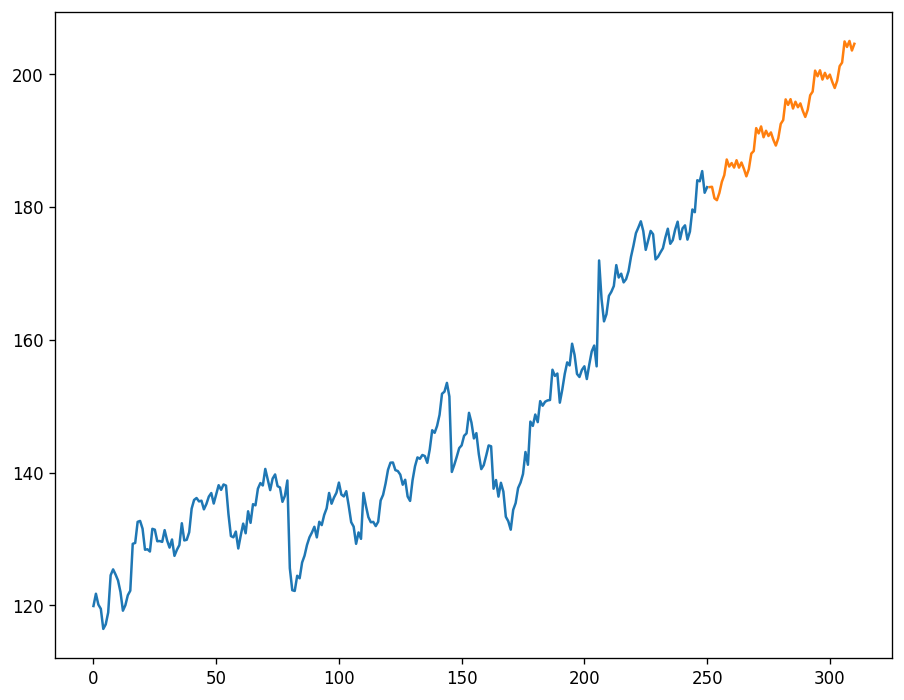

In [41]:
# predict next 30 days 
forecast =model.predict(n_periods=60)

# plot the forecast and original 
plt.plot(df['Close'])
plt.plot(forecast)

In [42]:
# lets run SARIMA
import statsmodels.api as sm
import warnings

model3 = sm.tsa.statespace.SARIMAX(df['Close'] , 
                                   order = (0,1,1) ,
                                   seasonal_order=(2,1,0,12))
model3 = model3.fit()
print(model3.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -596.856
Date:                             Tue, 02 Jul 2024   AIC                           1201.712
Time:                                     23:46:23   BIC                           1215.602
Sample:                                          0   HQIC                          1207.310
                                             - 251                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1078      0.065     -1.663      0.096      -0.235       0.019
ar.S.L12      -0.6806      

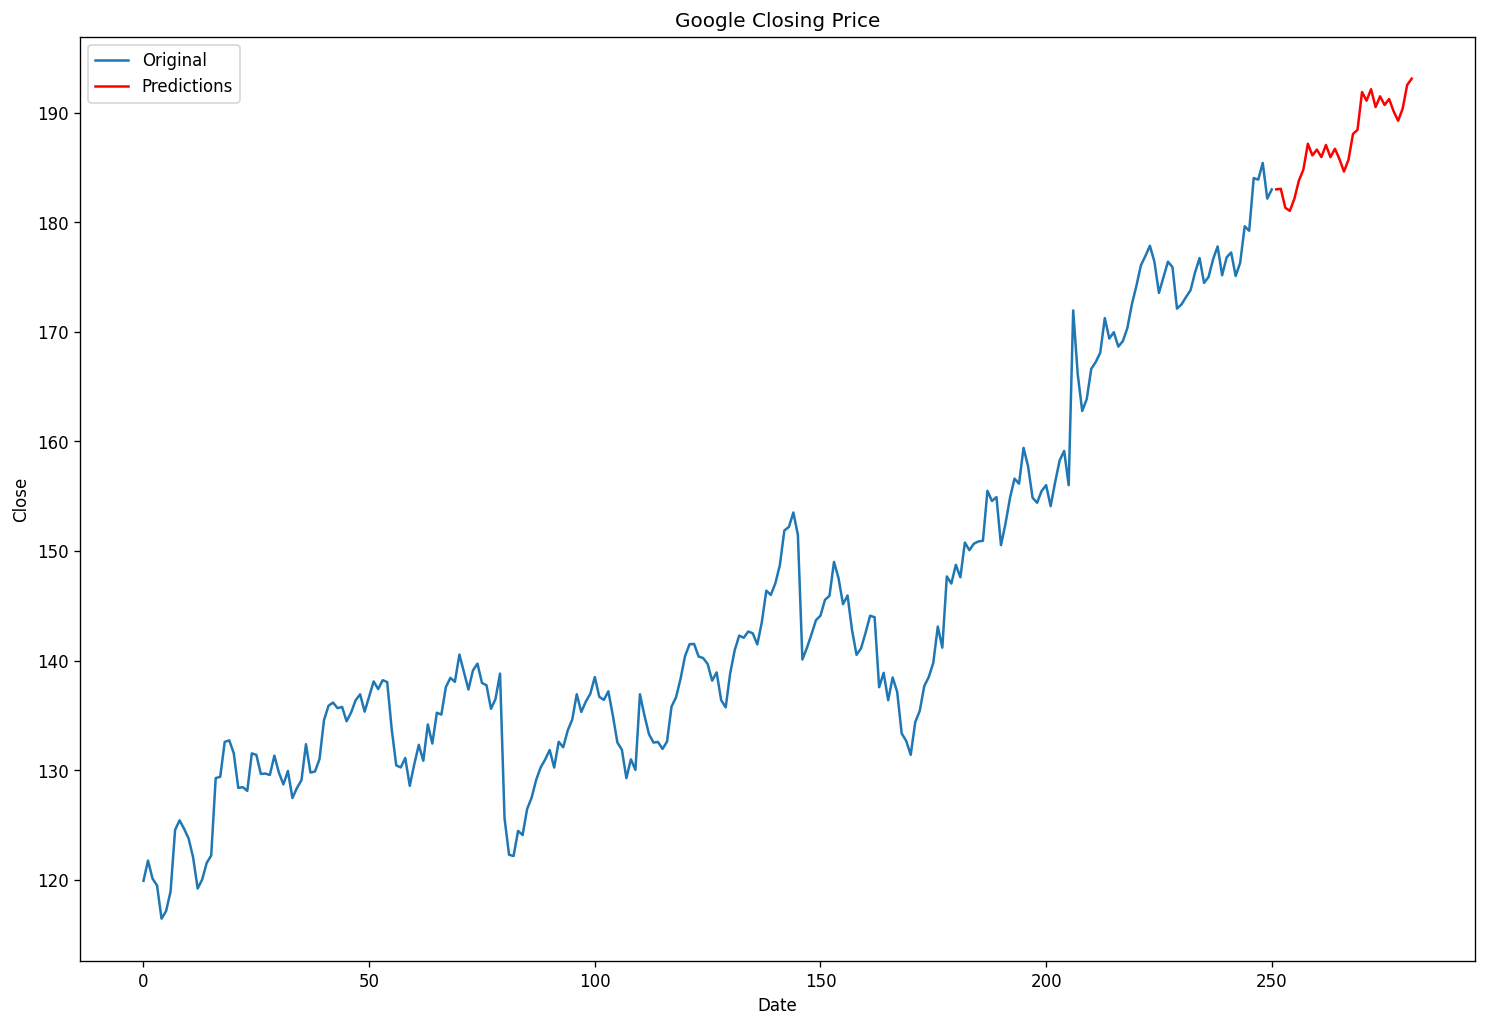

In [44]:
# predict next 30 days 
forecast =model3.predict(n_periods=60)

# plot the prediction of SARIMAX
predictions = model3.predict(start = len(df['Close']),end = len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15,10))
plt.plot(df['Close'] , label = 'Original')
plt.plot(predictions ,color= 'red',label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Google Closing Price')
 
# change the legend location
plt.legend(loc = 'upper left')
plt.show()